In [1]:
!pip install VESIcal
import sys
sys.path.append(r'..')
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
#plt.rcParams["mathtext.default"] = "regular"
#plt.rcParams["mathtext.fontset"] = "arial"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 12 # Overall title
plt.rcParams["axes.labelsize"] = 12 # Axes labels
plt.rcParams["legend.fontsize"]= 14

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Loading Bulk Comp for Isobars

In [3]:
Isobar_Bulk = v.BatchFile('ManganDataset.xlsx', sheet_name='Comps', input_type='wtpercent')
data_Isobar = Isobar_Bulk.data
data_Isobar

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/conda/lib/python3.8/site-packages/VESIcal/batchfile.py:164: RuntimeWarning: No Label column given, so column 'Unnamed: 0' was chosen for you. To choose your own, set label='<column-name>'.
  data = self.try_set_index(data, label)


SiO2  TiO2  Al2O3     Fe2O3       FeO   MnO  \
1892                           52.9  1.22   18.8  0.000000  9.210000  0.23   
1890                           53.0  1.15   19.0  0.000000  8.820000  0.30   
1894                           53.1  1.14   19.0  0.000000  8.840000  0.31   
Average                        53.0  1.17   18.9  0.000000  8.960000  0.28   
Average_10wtH2O_1125C_310MPa   53.0  1.17   18.9  1.734327  7.399433  0.28   
Average_0wtH2O_1125C_310MPa    53.0  1.17   18.9  1.794296  7.345473  0.28   
Average_10wtH2O_1125C_1200MPa  53.0  1.17   18.9  1.252672  7.832832  0.28   

                                MgO   CaO  Na2O   K2O   SO3    Cl    Fe3FeT  \
1892                           4.49  8.99  3.48  0.61  0.01  0.04  0.000000   
1890                           4.53  8.98  3.55  0.60  0.02  0.03  0.000000   
1894                           4.47  8.86  3.62  0.60  0.01  0.04  0.000000   
Average                        4.50  8.94  3.54  0.60  0.01  0.04  0.000000   
Average_10wtH2O_1125C_310MPa   4.50  8.94  3.54  0.60  0.01  0.04  0.174169   
Average_0wtH2O_1125C_310MPa    4.50  8.94  3.54  0.60  0.01  0.04  0.180191   
Average_10wtH2O_1125C_1200MPa  4.50  8.94  3.54  0.60  0.01  0.04  0.125799   

                               Cr2O3  NiO  CoO  P2O5  H2O  CO2  
1892                             0.0  0.0  0.0   0.0  0.0  0.0  
1890                             0.0  0.0  0.0   0.0  0.0  0.0  
1894                             0.0  0.0  0.0   0.0  0.0  0.0  
Average                          0.0  0.0  0.0   0.0  0.0  0.0  
Average_10wtH2O_1125C_310MPa     0.0  0.0  0.0   0.0  0.0  0.0  
Average_0wtH2O_1125C_310MPa      0.0  0.0  0.0   0.0  0.0  0.0  
Average_10wtH2O_1125C_1200MPa    0.0  0.0  0.0   0.0  0.0  0.0

## Loading Papale Isobars

In [4]:
PapaleIsobars= pd.read_excel('AndesiteIsobars_VESIcal_In_2021.xlsx', sheet_name='Papale_Isobars_Calc_Mangan')
PapaleIsobars_3= pd.read_excel('AndesiteIsobars_VESIcal_In_2021.xlsx', sheet_name='Papale_Isobars_Calc_Mangan_3')

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Loading in Experimental conditions

In [5]:
Bot2006=pd.read_excel('ManganDataset.xlsx', sheet_name='Sheet5')
Bot2006.head()

Label  SiO2  TiO2  Al2O3     Fe2O3       FeO   MnO  MgO   CaO  Na2O  K2O  \
0  1901.0  53.0  1.17   18.9  1.734327  7.399433  0.28  4.5  8.94  3.54  0.6   
1  1910.0  53.0  1.17   18.9  1.734327  7.399433  0.28  4.5  8.94  3.54  0.6   
2  2112.0  53.0  1.17   18.9  1.734327  7.399433  0.28  4.5  8.94  3.54  0.6   
3  2114.0  53.0  1.17   18.9  1.734327  7.399433  0.28  4.5  8.94  3.54  0.6   
4  2147.0  53.0  1.17   18.9  1.734327  7.399433  0.28  4.5  8.94  3.54  0.6   

    H2O  H2O_Err  CO2_ppm  CO2_Err     CO2      Total  Pressure_MPa  
0  2.73     0.05     1275       27  0.1275  102.92126           310  
1  3.83     0.06     1168       62  0.1168  104.01056           310  
2  2.29     0.13     1136      340  0.1136  102.46736           400  
3  3.35     0.06     1166      363  0.1166  103.53036           400  
4  4.40     0.16     1453      360  0.1453  104.60906           385

In [6]:
## Isobars for 

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:

# Calculating isobars for 20% Fe, at temperatures of 1100C, pressures of 2 and 5 kbar
"""To get composition from a specific sample in the input data:"""

bulk_comp_B2006_20Fe = Isobar_Bulk.get_sample_composition('Average_0wtH2O_1125C_310MPa', asSampleClass=True)
"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""


"""Define a list of pressures in bars:"""
pressures = [3100, 3850, 4000, 5200, 6000, 7200, 8150, 8750, 10150, 10350, 12000]

isobars_B2006_20Fe_1200, isopleths_B2006_20Fe_1200 = v.calculate_isobars_and_isopleths(sample=bulk_comp_B2006_20Fe, smooth_isobars=False,
                                            temperature=1126,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result
smoothed_isobars_B2006_20Fe_1200 = v.vplot.smooth_isobars_and_isopleths(isobars_B2006_20Fe_1200)



Calculating isobar at 3100 bars
 done.                                                                                                                           
Calculating isobar at 3850 bars
 done.                                                                                                                           
Calculating isobar at 4000 bars
 done.                                                                                                                           
Calculating isobar at 5200 bars
 done.                                                                                                                           
Calculating isobar at 6000 bars
 done.                                                                                                                           
Calculating isobar at 7200 bars
 done.                                                                                                                           
Calculating isobar at 8150 b

In [8]:
smoothed_isobars_B2006_20Fe_1200.to_excel('Mangan_Isobars_MagmaSat.xlsx')

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


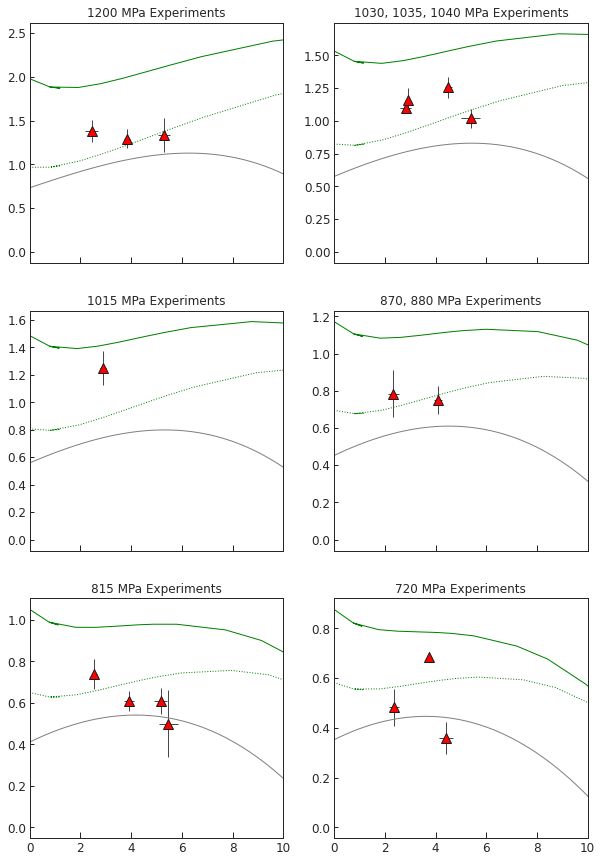

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (10,15), sharex=True) #
ax1.set_xlim([0, 10])
ax1.set_title('1200 MPa Experiments')
ax1.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==12000, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==12000, 'CO2_liq'],
         color='grey', linewidth=1)

ax1.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==12000, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==12000, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)

ax1.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==12000, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==12000, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)


ax1.errorbar(Bot2006.loc[Bot2006['Pressure_MPa']==1200, "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa']==1200, "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa']==1200, "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa']==1200, "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')


ax2.set_title('1030, 1035, 1040 MPa Experiments')
ax2.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==10350, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==10350, 'CO2_liq'],
         color='grey', linewidth=1)

ax2.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==10350, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==10350, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)


ax2.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==10350, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==10350, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)


ax2.errorbar(Bot2006.loc[Bot2006['Pressure_MPa'].between(1029, 1041), "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa'].between(1029, 1041), "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa'].between(1029, 1041), "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa'].between(1029, 1041), "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')



ax3.set_title('1015 MPa Experiments')
ax3.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==10150, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==10150, 'CO2_liq'],
         color='grey', linewidth=1)

ax3.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==10150, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==10150, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)

ax3.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==10150, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==10150, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)

ax3.errorbar(Bot2006.loc[Bot2006['Pressure_MPa']==1015, "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa']==1015, "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa']==1015, "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa']==1015, "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')


ax4.set_title('870, 880 MPa Experiments')
ax4.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==8750, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==8750, 'CO2_liq'],
         color='grey', linewidth=1)

ax4.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==8750, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==8750, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)

ax4.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==8750, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==8750, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)

ax4.errorbar(Bot2006.loc[Bot2006['Pressure_MPa'].between(869, 881), "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa'].between(869, 881), "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa'].between(869, 881), "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa'].between(869, 881), "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')


ax5.set_title('815 MPa Experiments')
ax5.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==8150, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==8150, 'CO2_liq'],
         color='grey', linewidth=1)

ax5.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==8150, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==8150, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)

ax5.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==8150, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==8150, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)

ax5.errorbar(Bot2006.loc[Bot2006['Pressure_MPa']==815, "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa']==815, "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa']==815, "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa']==815, "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')

ax6.set_title('720 MPa Experiments')
ax6.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==7200, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==7200, 'CO2_liq'],
         color='grey', linewidth=1)

ax6.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==7200, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==7200, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)

ax6.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==7200, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==7200, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)


ax6.errorbar(Bot2006.loc[Bot2006['Pressure_MPa']==720, "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa']==720, "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa']==720, "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa']==720, "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')


fig.savefig('Mangan2021_highP.svg', transparent=True)


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


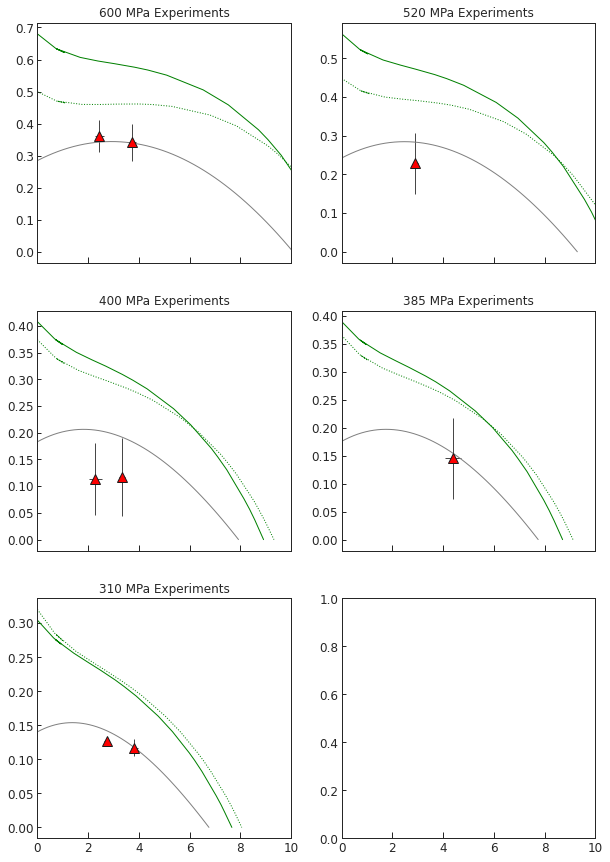

In [10]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (10,15), sharex=True) #
ax1.set_xlim([0, 10])
ax1.set_title('600 MPa Experiments')
ax1.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==6000, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==6000, 'CO2_liq'],
         color='grey', linewidth=1)

ax1.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==6000, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==6000, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)
ax1.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==6000, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==6000, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)


ax1.errorbar(Bot2006.loc[Bot2006['Pressure_MPa']==600, "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa']==600, "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa']==600, "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa']==600, "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')


ax2.set_title('520 MPa Experiments')
ax2.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==5200, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==5200, 'CO2_liq'],
         color='grey', linewidth=1)

ax2.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==5200, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==5200, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)
ax2.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==5200, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==5200, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)

ax2.errorbar(Bot2006.loc[Bot2006['Pressure_MPa']==520, "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa']==520, "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa']==520, "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa']==520, "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')

ax3.set_title('400 MPa Experiments')
ax3.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==4000, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==4000, 'CO2_liq'],
         color='grey', linewidth=1)
ax3.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==4000, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==4000, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)
ax3.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==4000, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==4000, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)

ax3.errorbar(Bot2006.loc[Bot2006['Pressure_MPa']==400, "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa']==400, "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa']==400, "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa']==400, "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')


ax4.set_title('385 MPa Experiments')
ax4.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==3850, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==3850, 'CO2_liq'],
         color='grey', linewidth=1)

ax4.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==3850, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==3850, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)
ax4.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==3850, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==3850, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)
ax4.errorbar(Bot2006.loc[Bot2006['Pressure_MPa']==385, "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa']==385, "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa']==385, "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa']==385, "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')


ax5.set_title('310 MPa Experiments')
ax5.plot(smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==3100, 'H2O_liq'],
        smoothed_isobars_B2006_20Fe_1200.loc[smoothed_isobars_B2006_20Fe_1200['Pressure']==3100, 'CO2_liq'],
         color='grey', linewidth=1)

ax5.plot(PapaleIsobars.loc[PapaleIsobars['Pressure']==3100, 'H2O_liq'],
        PapaleIsobars.loc[PapaleIsobars['Pressure']==3100, 'CO2_liq'], ':',
         color='green', linewidth=1, ms=5)
ax5.plot(PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==3100, 'H2O_liq'],
        PapaleIsobars_3.loc[PapaleIsobars_3['Pressure']==3100, 'CO2_liq'], '-',
         color='green', linewidth=1, ms=5)

ax5.errorbar(Bot2006.loc[Bot2006['Pressure_MPa']==310, "H2O"], 
             Bot2006.loc[Bot2006['Pressure_MPa']==310, "CO2"], 
             xerr=2*Bot2006.loc[Bot2006['Pressure_MPa']==310, "H2O_Err"],
             yerr=10**(-4)*2*Bot2006.loc[Bot2006['Pressure_MPa']==310, "CO2_Err"],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')



fig.savefig('Mangan2021_LowerP.svg', transparent=True)
